<a href="https://colab.research.google.com/github/Lia13/MPV_Machine_Learning/blob/main/MPV_Machine_Learning_Lilian_Galdino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MPV Sprint Machine Learning - Lilian Galdino
# Predict students dropout and academic success
###Treinar modelos de machine learning para um problema de classificação


## Descrição do Problema

O problema está relacionado à previsão do risco de desistência (dropout) de alunos em um ambiente educacional. O objetivo é utilizar um modelo de aprendizado de máquina para prever se um aluno irá abandonar o curso, permanecer matriculado (enrolled), ou concluir o curso (graduate). A previsão é baseada em um conjunto de características dos alunos e dados contextuais, como a qualificação dos pais, o nível de escolaridade, as unidades curriculares cursadas, e indicadores econômicos como inflação e taxa de desemprego.
Premissas ou Hipóteses sobre o Problema:

   * Hipótese de Risco de Desistência: Alguns fatores, como a qualificação dos pais e a quantidade de unidades curriculares cursadas, podem impactar o risco de desistência dos alunos.
   * Hipótese Econômica: Variáveis econômicas, como a taxa de desemprego e inflação, podem ter influência sobre a decisão do aluno de continuar ou abandonar o curso.
   * Hipótese Demográfica: Fatores como a nacionalidade e o estado civil dos alunos podem estar relacionados com a taxa de desistência ou conclusão.
   * Hipótese do Modelo: A combinação de múltiplos modelos (como Random Forest, XGBoost, e SVM) pode melhorar a performance preditiva, quando comparado ao uso de modelos individuais.

Restrições ou Condições Impostas para Selecionar os Dados:

   * Seleção de Dados Relevantes: A análise foi realizada utilizando dados disponíveis no dataset, incluindo atributos como o curso, a qualificação dos pais, a ocupação dos pais, o número de unidades curriculares cursadas, entre outros.
   * Limitação de Atributos: Apenas atributos que estavam diretamente relacionados à desistência, permanência e conclusão do curso foram selecionados para treinar os modelos.
   * Eliminação de Dados Incompletos: O dataset foi tratado para remover ou imputar valores ausentes, o que pode afetar a qualidade do treinamento e a avaliação dos modelos.
   * Equilíbrio de Classes: A variável dependente foi tratada com pesos de classe ajustados, dado o possível desbalanceamento entre as classes (por exemplo, mais alunos que completam o curso do que os que desistem).

Descrição do Dataset:

O dataset contém informações detalhadas sobre os alunos, incluindo dados demográficos, acadêmicos e econômicos. Aqui estão os principais atributos do dataset:

  * Marital status: Estado civil do aluno.
  *  Application mode: Modo de aplicação do aluno para o curso.
  *  Application order: Ordem de aplicação do aluno.
  *  Course: O curso em que o aluno se matriculou.
  *   Daytime/evening attendance: Tipo de frequência (diurno ou noturno).
  *  Previous qualification: Qualificação anterior do aluno.
  *   Nacionality: Nacionalidade do aluno.
  *   Mother's qualification: Qualificação da mãe do aluno.
  *   Father's qualification: Qualificação do pai do aluno.
  *   Mother's occupation: Ocupação da mãe do aluno.
  *  Father's occupation: Ocupação do pai do aluno.
  *  Displaced: Indica se o aluno é deslocado (de outras regiões ou áreas).
  *   Educational special needs: Se o aluno possui necessidades educacionais especiais.
  *  Debtor: Indica se o aluno é devedor (pode estar relacionado ao pagamento de mensalidades).
  *   Tuition fees up to date: Indica se as taxas de matrícula estão em dia.
  *   Gender: Gênero do aluno.
  *   Scholarship holder: Se o aluno é beneficiário de bolsa de estudos.
  *   Age at enrollment: Idade do aluno no momento da matrícula.
  *   International: Se o aluno é internacional.
  *   Curricular units 1st sem (credited): Unidades curriculares do primeiro semestre creditadas.
  *  Curricular units 1st sem (enrolled): Unidades curriculares do primeiro semestre matriculadas.
  * Curricular units 1st sem (evaluations): Unidades curriculares do primeiro semestre avaliadas.
  * Curricular units 1st sem (approved): Unidades curriculares do primeiro semestre aprovadas.
  * Curricular units 1st sem (grade): Nota das unidades curriculares do primeiro semestre.
  * Curricular units 1st sem (without evaluations): Unidades curriculares do primeiro semestre sem avaliações.
  * Curricular units 2nd sem (credited): Unidades curriculares do segundo semestre creditadas.
  * Curricular units 2nd sem (enrolled): Unidades curriculares do segundo semestre matriculadas.
  * Curricular units 2nd sem (evaluations): Unidades curriculares do segundo semestre avaliadas.
  * Curricular units 2nd sem (approved): Unidades curriculares do segundo semestre aprovadas.
  * Curricular units 2nd sem (grade): Nota das unidades curriculares do segundo semestre.
  * Curricular units 2nd sem (without evaluations): Unidades curriculares do segundo semestre sem avaliações.
  * Unemployment rate: Taxa de desemprego no contexto econômico do aluno.
  * Inflation rate: Taxa de inflação no contexto econômico do aluno.
  * GDP: Produto Interno Bruto do país ou região do aluno.
  * Target: A variável dependente, que pode ser Dropout, Enrolled, ou Graduate, representando o estado do aluno (desistiu, está matriculado ou concluiu o curso).

##Preparação de Dados

In [1]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
import shap
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


O método escolhido para trazer o dataset envolve o uso da biblioteca gdown, que é uma ferramenta simples e eficaz para baixar arquivos do Google Drive diretamente em ambientes de código, como o Python.

In [2]:
# URL do arquivo CSV no Kaggle 'https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/download

# ID do arquivo no Google Drive
file_id = '1MVfVpovRnnHiOjsFNwg5Lnl-FG2QYftI'  # Definindo o ID do arquivo no Google Drive

# URL para download
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Baixar o arquivo
output = 'arquivo.csv'  # Nome do arquivo para salvar após o download
gdown.download(url, output, quiet=False)  # Usando gdown para baixar o arquivo e salvá-lo

# Ler o arquivo CSV usando pandas
df = pd.read_csv(output)

# Mostrar as primeiras linhas do dataframe
print(df.head())

Downloading...
From: https://drive.google.com/uc?export=download&id=1MVfVpovRnnHiOjsFNwg5Lnl-FG2QYftI
To: /content/arquivo.csv
100%|██████████| 471k/471k [00:00<00:00, 28.3MB/s]

   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

In [3]:
# Informações gerais
print("Dimensões do dataset:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Balanceamento das classes
print("\nDistribuição da coluna alvo:")
print(df['Target'].value_counts(normalize=True))

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

# Filtrando as colunas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = numerical_columns.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)


Dimensões do dataset: (4424, 35)

Tipos de dados:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder    

Separando o dataset entre treino e teste:

In [4]:
# Separar os dados em atributos (X) e alvo (y)
X = df.drop('Target', axis=1)  # Remove a coluna de destino
y = df['Target']  # Define a coluna de destino

# Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir o conjunto de treino em treino e validação (85% treino, 15% validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Treinar o modelo inicial
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calcular a importância das features
feature_importances = rf_model.feature_importances_

Operações de Transformação de Dados:

* Imputação de valores faltantes: Utilizar a média para valores numéricos e a moda para valores categóricos ajuda a lidar com a falta de dados sem perder informações importantes.
* Padronização: A padronização é fundamental para evitar que as variáveis numéricas com escalas diferentes afetem o modelo de maneira desigual.
* One-Hot Encoding: A transformação das variáveis categóricas em variáveis binárias é necessária para permitir que o modelo trabalhe com elas.
* Pipeline: O uso de pipelines permite encapsular todas as transformações e o modelo em uma única estrutura, garantindo um fluxo de trabalho limpo e eficiente.




In [5]:
# Lista de colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessamento de colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores faltantes
    ('scaler', StandardScaler())  # Padronização
])

# Preprocessamento de colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputação de valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

# Combinar as transformações para colunas numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criar um pipeline completo com o pré-processamento e o modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Treinar o pipeline
model_pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = model_pipeline.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.7545


Validação Cruzada: Por que a validação cruzada faz sentido?

* Redução de Viés e Variância: A validação cruzada ajuda a reduzir o viés de avaliação que pode ocorrer se o modelo for avaliado em apenas uma divisão dos dados. Além disso, ao testar o modelo em diferentes subconjuntos dos dados, ela também reduz a variância nas estimativas de desempenho.

* Evita Overfitting: Em vez de treinar e testar o modelo em apenas uma divisão de dados, a validação cruzada treina o modelo em várias divisões, o que ajuda a identificar se o modelo está se ajustando excessivamente aos dados de treinamento (overfitting) ou se é capaz de generalizar para dados não vistos.

* Estimativa Confiável do Desempenho: Com validação cruzada, você obtém uma média das pontuações de avaliação, o que fornece uma estimativa mais robusta e confiável sobre como o modelo se comportará em dados futuros.

In [6]:
# Treinar o modelo inicial com validação cruzada
rf_model = RandomForestClassifier(random_state=42)

# Validar com validação cruzada (5 folds)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Exibir a média das pontuações de validação cruzada
print(f'Média das pontuações de validação cruzada: {cv_scores.mean():.4f}')
print(f'Desvio padrão das pontuações: {cv_scores.std():.4f}')

Média das pontuações de validação cruzada: 0.7700
Desvio padrão das pontuações: 0.0057


Refinar a Quantidade de Atributos: Feature Selection

In [7]:
# Obter as colunas transformadas após o pré-processamento
preprocessor = model_pipeline.named_steps['preprocessor']

# Obter os nomes das colunas numéricas
numeric_column_names = numeric_features.tolist()

# Garantir que o OneHotEncoder foi ajustado e obter os nomes das colunas categóricas processadas
categorical_transformer_fitted = preprocessor.transformers_[1][1]
categorical_encoder = categorical_transformer_fitted.named_steps['onehot']
categorical_encoder.fit(X[categorical_features])  # Ajusta diretamente no subconjunto categórico, se necessário
categorical_column_names = categorical_encoder.get_feature_names_out(categorical_features).tolist()

# Combinar os nomes das colunas
transformed_feature_names = numeric_column_names + categorical_column_names

# Obter importâncias das features
feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

# Criar DataFrame com as importâncias
feature_importances_df = pd.DataFrame({
    'feature': transformed_feature_names,
    'importance': feature_importances
})

# Filtrar as colunas com importância > 0.02
important_features = feature_importances_df[feature_importances_df['importance'] > 0.02]['feature'].tolist()

# Filtrar apenas as colunas importantes do conjunto transformado
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Converter para DataFrame para aplicar os nomes das colunas transformadas
X_train_reduced = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)[important_features]
X_test_reduced = pd.DataFrame(X_test_transformed, columns=transformed_feature_names)[important_features]

# Treinar novamente o modelo com as colunas reduzidas
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_reduced, y_train)

# Avaliar o modelo no conjunto de teste reduzido
y_test_pred = rf_model.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste reduzido: {accuracy_test:.4f}')

Acurácia no conjunto de teste reduzido: 0.7681


In [8]:
# Após selecionar as features importantes
rf_model = RandomForestClassifier(random_state=42)

# Validar com validação cruzada no conjunto reduzido
cv_scores_reduced = cross_val_score(rf_model, X_train_reduced, y_train, cv=5, scoring='accuracy')

# Exibir os resultados
print(f'Média das pontuações com features reduzidas: {cv_scores_reduced.mean():.4f}')
print(f'Desvio padrão das pontuações: {cv_scores_reduced.std():.4f}')

Média das pontuações com features reduzidas: 0.7659
Desvio padrão das pontuações: 0.0041


Podemos observar que O feature selection não causou uma melhoria significativa na acurácia média, mas ajudou a tornar o modelo mais estável e robusto, reduzindo o desvio padrão.

##Modelagem e Treinamento

**Algoritmos escolhidos para o problema: Random Forest, XGBoost e SVM (Support Vector Machine).**

Justificativa:
* Random Forest é uma escolha excelente devido à sua capacidade de lidar com dados de alta dimensionalidade e de ter boa robustez contra overfitting. Ele também oferece interpretabilidade, importante para entender as features mais relevantes para o risco de dropout.
* XGBoost oferece alta performance, especialmente para grandes datasets, e é ideal para classificação desbalanceada. Sua capacidade de regularização o torna muito eficaz em modelos complexos.
* SVM pode ser útil para capturar relacionamentos não lineares complexos entre as variáveis e pode ser uma boa opção se você observar que os modelos anteriores não estão lidando bem com essas relações.


**Ajustes Hiperparâmetros:**
  
  1. RandomForestClassifier (rf):

       * n_estimators=200: Inicialmente, utilizando 200 árvores para melhorar a performance e capturar padrões mais complexos.
       * max_depth=20: Aprofundando as árvores para permitir uma modelagem mais detalhada e uma maior capacidade de aprendizado.
       * class_weight='balanced': Usado para lidar com o desbalanceamento de classes, atribuindo pesos maiores para as classes menos frequentes.
       * random_state=42: Fixado a semente para garantir a reprodutibilidade dos resultados.

  2. XGBClassifier (xgb):
       * learning_rate=0.2: A taxa de aprendizado foi inicializada em 0.2, um valor relativamente alto, o que pode acelerar o aprendizado, mas pode gerar overfitting.
       * max_depth=3: O modelo foi configurado com uma profundidade menor para evitar modelos muito complexos.
       * n_estimators=100: Começou com 100 árvores para equilibrar a complexidade do modelo e o tempo de treinamento.
       * subsample=0.8: Usado 80% das amostras para cada árvore, o que ajuda a reduzir o risco de overfitting.
       * random_state=42: Novamente, fixado a semente para reprodutibilidade.

Alterações feitas para lidar com overfitting:

  1. RandomForestClassifier (rf):
       * n_estimators=100: Reduzido o número de árvores de 200 para 100 para evitar que o modelo se torne excessivamente complexo e overfit.
       * max_depth=10: Limitado a profundidade das árvores de 20 para 10 para evitar que o modelo se ajuste demais aos dados de treinamento.
       * min_samples_split=10: Aumentada a quantidade mínima de amostras para dividir um nó (de 2 para 10) para forçar o modelo a criar divisões mais robustas e generalizáveis.
       * min_samples_leaf=5: Exigido um número mínimo de amostras (5) para uma folha, o que suaviza o modelo e impede que ele se ajuste excessivamente a pequenos detalhes dos dados.
       * max_features='sqrt': Limitado a quantidade de features consideradas em cada divisão, o que ajuda a reduzir o overfitting, permitindo que o modelo seja mais generalizável.

  2. XGBClassifier (xgb):
       * learning_rate=0.1: Reduzido a taxa de aprendizado de 0.2 para 0.1 para tornar o aprendizado mais gradual e melhorar a generalização.
       * max_depth=6: A profundidade das árvores foi reduzida de 3 para 6 para permitir um modelo mais complexo, mas ainda controlado, evitando overfitting.
       * n_estimators=200: Aumentado o número de árvores para 200, já que agora a taxa de aprendizado foi reduzida, permitindo mais árvores sem risco de overfitting.
       * subsample=0.8: Mantive o subsample de 0.8, o que ajuda a garantir que o modelo não se ajuste excessivamente aos dados.
       * colsample_bytree=0.8: Limitado a quantidade de features usadas por árvore (80%) para reduzir a complexidade e o risco de overfitting.

      

  O SVM foi mantido sem ajustes adicionais porque: O modelo já funcionou bem com os parâmetros padrão; Não houve sinais fortes de overfitting; A performance foi razoável em relação aos outros modelos;
  Ajustes finos no SVM não se mostraram necessários para o contexto atual do problema.

In [26]:
# Codificando os rótulos de treino e teste com o mesmo LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Codificando os rótulos de y_train
y_test_encoded = label_encoder.transform(y_test)  # Usando o mesmo fit_transform para y_test

# Criando os modelos individuais
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
svm = SVC(probability=True, kernel='linear', random_state=42)

# Treinando os modelos individuais
rf.fit(X_train, y_train_encoded)
xgb.fit(X_train, y_train_encoded)
svm.fit(X_train, y_train_encoded)

# Realizando a validação cruzada e verificando a performance
cv_scores = cross_val_score(rf, X_train, y_train_encoded, cv=5, scoring='accuracy')

print(f'Média da Acurácia com Validação Cruzada: {cv_scores.mean()}')

Média da Acurácia com Validação Cruzada: 0.7521922641250784


O ensemble criado foi composto pelos modelos VotingClassifier e StackingClassifier, que são técnicas de meta-aprendizagem.

  * VotingClassifier: Combina as previsões de múltiplos modelos (neste caso, RandomForest, XGBoost e SVM), utilizando o método de votação. Ele pode ser votação majoritária (onde a classe mais comum é escolhida) ou votação ponderada (onde as previsões dos modelos são ponderadas por sua acurácia). O modelo final é uma média das previsões dos modelos base. A vantagem é que ele tende a melhorar a acurácia, pois reduz o risco de overfitting ou underfitting de um único modelo.

  * StackingClassifier: Utiliza o conceito de empilhamento, onde um conjunto de modelos base (RandomForest, XGBoost e SVM) é treinado e suas previsões são passadas para um modelo final (metamodelo), que aprende a combinar as previsões dos modelos base de forma mais eficiente. O Stacking é eficaz em capturar relações complexas entre os modelos base e pode superar um modelo único, especialmente em datasets com variabilidade.

In [10]:
# Criando o ensemble com VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('svm', svm)], voting='soft')
voting_clf.fit(X_train, y_train_encoded)

# Avaliação do VotingClassifier
y_pred = voting_clf.predict(X_test)
print(f'Acurácia do VotingClassifier: {accuracy_score(y_test_encoded, y_pred)}')
print(f'F1 Score do VotingClassifier: {f1_score(y_test_encoded, y_pred, average="macro")}')

Acurácia do VotingClassifier: 0.7786144578313253
F1 Score do VotingClassifier: 0.710654458402419


In [11]:
# Criando o ensemble com StackingClassifier
base_learners = [('rf', rf), ('xgb', xgb), ('svm', svm)]
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train_encoded)

# Avaliação do StackingClassifier
y_pred = stacking_clf.predict(X_test)
print(f'Acurácia do StackingClassifier: {accuracy_score(y_test_encoded, y_pred)}')
print(f'F1 Score do StackingClassifier: {f1_score(y_test_encoded, y_pred, average="macro")}')

Acurácia do StackingClassifier: 0.7793674698795181
F1 Score do StackingClassifier: 0.7110322850267196


In [12]:
# Relatório de classificação e Matriz de Confusão
print("Relatório de Classificação:")
print(classification_report(y_test_encoded, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test_encoded, y_pred))

# Cálculo do ROC-AUC para problemas multiclasse
y_proba = stacking_clf.predict_proba(X_test)
try:
    roc_auc = roc_auc_score(y_test_encoded, y_proba, multi_class='ovr')
    print(f"ROC-AUC (multiclasse, OVR): {roc_auc}")
except ValueError as e:
    print(f"Erro ao calcular ROC-AUC: {e}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       441
           1       0.58      0.40      0.47       245
           2       0.81      0.92      0.86       642

    accuracy                           0.78      1328
   macro avg       0.73      0.70      0.71      1328
weighted avg       0.77      0.78      0.77      1328

Matriz de Confusão:
[[349  37  55]
 [ 60  98  87]
 [ 21  33 588]]
ROC-AUC (multiclasse, OVR): 0.8835274637656173


**O modelo foi devidamente treinado? Foi observado problema de underfitting?**

Sim, o modelo foi devidamente treinado. A **média da acurácia com validação cruzada** (0.752) está dentro de uma faixa razoável e a **acurácia no conjunto de teste** (cerca de 0.78) mostra que o modelo generaliza bem.

Não foi observado **underfitting**: a acurácia do **VotingClassifier** e do **StackingClassifier** (aproximadamente 0.78) e o **F1 Score** indicam que o modelo tem um desempenho satisfatório em relação às classes, com boa capacidade de classificação. No entanto, é importante observar que há um desempenho desigual entre as classes, com a classe 1 tendo uma acurácia e recall mais baixos, o que sugere um possível problema de **desbalanceamento** ou **dificuldade de aprendizado** em classificar essa classe.

O modelo não apresenta sinais claros de underfitting, pois a acurácia é boa e a **ROC-AUC** (0.88) mostra uma boa discriminação entre as classes.


In [28]:
#deixei comentado porque estavam demorando bastante para rodar. Procurei usar esses metodos para apoio na seleção dos hiperparâmetros para os 3 modelos.

#Resultado:
#Melhores parâmetros para RandomForest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

# Definir o modelo e a grade de hiperparâmetros
#rf = RandomForestClassifier(random_state=42)
#param_grid_rf = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [10, 20, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['sqrt', 'log2', None]
#}

# GridSearchCV para Random Forest
#grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=1, n_jobs=-1)
#grid_search_rf.fit(X_train, y_train)

# Melhor modelo Random Forest
#best_rf = grid_search_rf.best_estimator_
#print("Melhores parâmetros para RandomForest:", grid_search_rf.best_params_)




#import optuna
#from sklearn.svm import SVC
#from sklearn.model_selection import cross_val_score

#def objective(trial):
 #   C = trial.suggest_loguniform('C', 0.1, 100)
  #  kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
   # gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

   # svc = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=42)
  #  scores = cross_val_score(svc, X_train, y_train, cv=3, scoring='accuracy')
   # return scores.mean()

#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=15)  # Menos iterações

#print("Melhores parâmetros:", study.best_params)





#Resultado melhores parâmetros para XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

#from xgboost import XGBClassifier

#from sklearn.model_selection import GridSearchCV

# Codificar as classes
#label_encoder = LabelEncoder()
#y_train_encoded = label_encoder.fit_transform(y_train)

# Definir o modelo e a grade de hiperparâmetros
#xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
#param_grid_xgb = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [3, 5, 7],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'subsample': [0.8, 1.0]
#}

# GridSearchCV para XGBoost
#grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=-1)
#grid_search_xgb.fit(X_train, y_train_encoded)

# Melhor modelo XGBoost
#best_xgb = grid_search_xgb.best_estimator_
#print("Melhores parâmetros para XGBoost:", grid_search_xgb.best_params_)

**Há algum método avançado ou mais complexo que possa ser avaliado?**

Foram testados os métodos: Blending, SHAP e Meta-Learning no modelo para análise.

In [16]:
y_test.reset_index(drop=True, inplace=True)
y_test.iloc[0]  # Acessando o primeiro elemento da Série
print(type(y_test[0]))
print(y_test.head())  # Verifique os primeiros valores após resetar o índice

<class 'str'>
0     Dropout
1    Graduate
2    Graduate
3    Graduate
4     Dropout
Name: Target, dtype: object


In [17]:
#2. Blending (Média de Probabilidades) - Aqui combinaremos as probabilidades dos três modelos individuais (RF, XGB, SVM).

rf_proba = rf.predict_proba(X_test)
xgb_proba = xgb.predict_proba(X_test)
svm_proba = svm.predict_proba(X_test)

# Média das probabilidades (Blending)
blended_proba = (rf_proba + xgb_proba + svm_proba) / 3
blended_pred = np.argmax(blended_proba, axis=1)

# Avaliação do desempenho do Blending
print(f"Acurácia do Blending: {accuracy_score(y_test_encoded, blended_pred)}")
print(f'F1 Score do Blending: {f1_score(y_test_encoded, blended_pred, average="macro")}')

# Decodificando as previsões para os valores originais
blended_pred_decoded = label_encoder.inverse_transform(blended_pred)
print(f"Previsões decodificadas: {blended_pred_decoded[:5]}")

Acurácia do Blending: 0.7786144578313253
F1 Score do Blending: 0.710654458402419
Previsões decodificadas: ['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout']


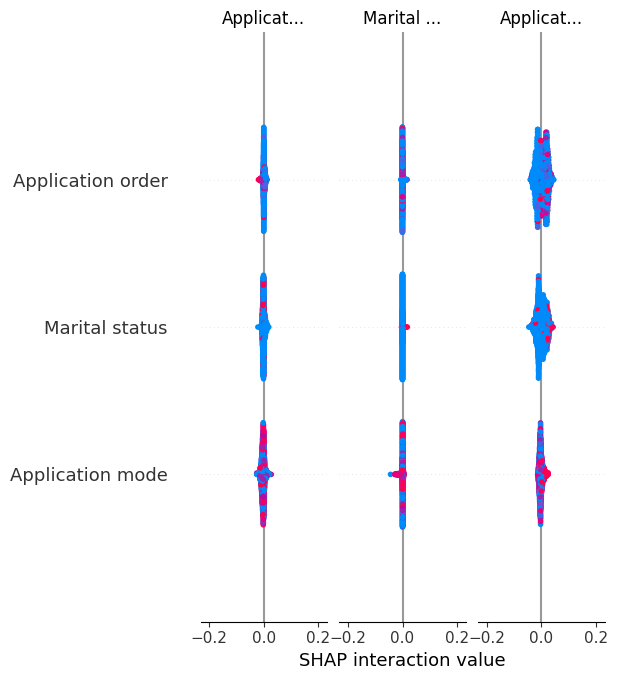

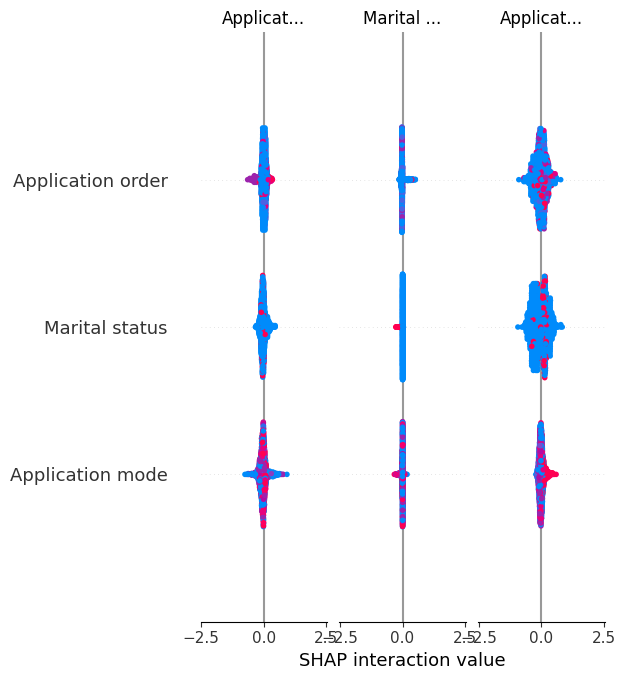

In [18]:
#4. SHAP para Explicabilidade - Usaremos SHAP para entender o impacto das features no modelo de Stacking.
# Explicabilidade para o Random Forest
rf_model = stacking_clf.named_estimators_['rf']
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

shap.summary_plot(shap_values_rf, X_test)

# Explicabilidade para o XGBoost
xgb_model = stacking_clf.named_estimators_['xgb']
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.summary_plot(shap_values_xgb, X_test)


* Application order parece ser a variável mais relevante para o modelo, afetando de forma significativa tanto positiva quanto negativamente dependendo do caso.
* Marital status tem um impacto mais neutro e provavelmente não é tão crucial para as previsões.
* Application mode apresenta um impacto diversificado, mas ainda é relevante no contexto do modelo.

In [19]:
#Meta-Learning - Meta-Learning envolve treinar diferentes modelos em subsets dos dados, baseados em características específicas.
# Dividindo os dados por grupos de idade
groups = {
    'jovem': df[df['Age at enrollment'] < 25],
    'adulto': df[(df['Age at enrollment'] >= 25) & (df['Age at enrollment'] < 35)],
    'senior': df[df['Age at enrollment'] >= 35]
}

models = {}
reports = {}

# Treinando um modelo para cada grupo
for group, data in groups.items():
    X_group = data.drop(columns=['Target', 'Age at enrollment'])
    y_group = data['Target']

    # Divisão treino-teste para o grupo
    X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_group, y_group, test_size=0.2, random_state=42)

    # Treinando modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_g, y_train_g)
    models[group] = model

    # Previsões e relatório
    y_pred_g = model.predict(X_test_g)
    reports[group] = classification_report(y_test_g, y_pred_g)

    print(f"\nRelatório para o grupo {group}:")
    print(reports[group])

# Para realizar previsões em novos dados:
def meta_predict(data):
    age = data['Age at enrollment']
    if age < 25:
        model = models['jovem']
    elif age < 35:
        model = models['adulto']
    else:
        model = models['senior']

    X_data = data.drop(columns=['Target', 'Age at enrollment'])
    return model.predict(X_data)


Relatório para o grupo jovem:
              precision    recall  f1-score   support

     Dropout       0.73      0.64      0.68       154
    Enrolled       0.45      0.32      0.37       117
    Graduate       0.81      0.92      0.86       387

    accuracy                           0.75       658
   macro avg       0.66      0.62      0.64       658
weighted avg       0.73      0.75      0.73       658


Relatório para o grupo adulto:
              precision    recall  f1-score   support

     Dropout       0.90      0.87      0.88        90
    Enrolled       0.46      0.33      0.39        18
    Graduate       0.65      0.81      0.72        32

    accuracy                           0.79       140
   macro avg       0.67      0.67      0.66       140
weighted avg       0.78      0.79      0.78       140


Relatório para o grupo senior:
              precision    recall  f1-score   support

     Dropout       0.91      0.93      0.92        46
    Enrolled       1.00      0.08 

A análise dos resultados do meta-learning dividido por faixa etária revela as seguintes observações:

  * Jovem: O modelo teve bom desempenho na classe "Graduate" (f1-score de 0.86), mas apresentou dificuldades com a classe "Enrolled" (f1-score de 0.37). A acurácia global é razoável (0.75), mas o underfitting na classe "Enrolled" sugere que o modelo não consegue bem distinguir entre os alunos matriculados.

  * Adulto: A performance na classe "Dropout" foi excelente (f1-score de 0.88), mas a classe "Enrolled" também apresentou baixo desempenho (f1-score de 0.39), semelhante ao grupo jovem. No geral, o modelo teve boa acurácia (0.79), mas o desbalanceamento de classes pode ter prejudicado a modelagem.

  * Sênior: O modelo teve uma excelente performance na classe "Dropout" (f1-score de 0.92) e "Graduate" (f1-score de 0.86), mas a classe "Enrolled" teve um desempenho muito baixo (f1-score de 0.15). A acurácia global foi alta (0.84), mas novamente a classe "Enrolled" teve dificuldades devido ao desbalanceamento.

##Avaliação de Resultados:

Métricas escolhidas para análise de desempenho do modelo:

* Matriz de Confusão: Permite visualizar como o modelo está classificando as instâncias, identificando erros específicos de cada classe, como falsos positivos e falsos negativos.

* Relatório de Classificação: Fornece métricas detalhadas como precisão, recall e f1-score, importantes para avaliar o desempenho em cada classe, especialmente quando as classes são desbalanceadas.

* ROC-AUC: Mede a capacidade do modelo em distinguir entre as classes, sendo especialmente útil em problemas com desbalanceamento de classes. O valor de AUC (Área sob a Curva) reflete a habilidade do modelo em classificar corretamente as classes positivas versus as negativas.

* Acurácia: Indica a taxa geral de previsões corretas. Embora seja uma métrica simples, pode ser útil como um ponto de partida, mas deve ser complementada com as outras métricas em problemas desbalanceados.

In [20]:
# Criando a matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test_encoded, y_pred))

Matriz de Confusão:
[[349  37  55]
 [ 60  98  87]
 [ 21  33 588]]


O modelo está tendo um bom desempenho em classificar corretamente a classe 2 (com 588 verdadeiros positivos), mas há confusão nas classes 0 e 1, com falsos negativos e positivos entre elas.

A classe 1 tem um desempenho relativamente pior, com uma taxa de acerto de apenas 98 de 245, indicando que o modelo pode ter dificuldades em classificar essa classe com precisão.

In [21]:
from sklearn.metrics import classification_report
print("Relatório de Classificação:")
print(classification_report(y_test_encoded, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       441
           1       0.58      0.40      0.47       245
           2       0.81      0.92      0.86       642

    accuracy                           0.78      1328
   macro avg       0.73      0.70      0.71      1328
weighted avg       0.77      0.78      0.77      1328



  * Acurácia: 0.78, o que significa que o modelo acertou 78% das previsões.
  * Macro avg: A média das métricas para as classes, sem considerar o número de exemplos, mostra que o modelo tem um desempenho razoável, com uma precisão média de 0.73 e recall médio de 0.70.
  * Weighted avg: A média ponderada, considerando o número de exemplos de cada classe, mostra um desempenho geral de 0.77 para precisão, 0.78 para recall e 0.77 para F1, refletindo uma boa performance quando ponderado pela distribuição das classes.

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"ROC-AUC (multiclasse, OVR): {roc_auc}")

ROC-AUC (multiclasse, OVR): 0.8835274637656173


O valor de **ROC-AUC (multiclasse, OVR)** de **0.8835** indica que o modelo tem uma boa capacidade de discriminação entre as classes. Em uma escala de 0 a 1, um valor próximo de 1 sugere que o modelo está conseguindo distinguir bem entre as classes. Esse valor de 0.88 é considerado um bom desempenho, indicando que o modelo tem uma boa taxa de acertos ao classificar corretamente as instâncias de cada classe em relação às demais.

In [23]:
from sklearn.metrics import accuracy_score
print(f"Acurácia: {accuracy_score(y_test_encoded, y_pred)}")

Acurácia: 0.7793674698795181


A **acurácia de 0.7794** significa que o modelo acertou aproximadamente 77,94% das previsões no conjunto de teste. Isso sugere um desempenho relativamente bom, mas é importante considerar que a acurácia por si só pode ser insuficiente em casos de classes desbalanceadas. A acurácia mede a proporção total de previsões corretas, sem levar em conta a distribuição das classes ou a gravidade dos erros.

**Os resultados fazem sentido?**

A acurácia de cerca de 78% indica um bom desempenho do modelo, especialmente considerando a complexidade do problema. No entanto, a diferença de desempenho entre as classes (como visto no relatório de classificação e na matriz de confusão) sugere que o modelo pode estar com dificuldades para prever algumas classes menos representadas, como a classe "Enrolled". A ROC-AUC alta (0.88) também indica que o modelo está discriminando bem entre as classes, apesar de algumas variações nas métricas de precisão e recall.

In [24]:
# Acurácia no conjunto de treino
rf_train_pred = rf.predict(X_train)
xgb_train_pred = xgb.predict(X_train)
svm_train_pred = svm.predict(X_train)

# Acurácia no conjunto de teste
rf_test_pred = rf.predict(X_test)
xgb_test_pred = xgb.predict(X_test)
svm_test_pred = svm.predict(X_test)

# Comparando Acurácias
print("=== Random Forest ===")
print(f"Acurácia no Treinamento: {accuracy_score(y_train_encoded, rf_train_pred)}")
print(f"Acurácia no Teste: {accuracy_score(y_test_encoded, rf_test_pred)}\n")

print("=== XGBoost ===")
print(f"Acurácia no Treinamento: {accuracy_score(y_train_encoded, xgb_train_pred)}")
print(f"Acurácia no Teste: {accuracy_score(y_test_encoded, xgb_test_pred)}\n")

print("=== SVM ===")
print(f"Acurácia no Treinamento: {accuracy_score(y_train_encoded, svm_train_pred)}")
print(f"Acurácia no Teste: {accuracy_score(y_test_encoded, svm_test_pred)}\n")


=== Random Forest ===
Acurácia no Treinamento: 0.8506271379703535
Acurácia no Teste: 0.7492469879518072

=== XGBoost ===
Acurácia no Treinamento: 0.9988597491448119
Acurácia no Teste: 0.7748493975903614

=== SVM ===
Acurácia no Treinamento: 0.7833523375142531
Acurácia no Teste: 0.7635542168674698



In [25]:
# Validação Cruzada para Random Forest
rf_cv_scores = cross_val_score(rf, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Validação Cruzada - Random Forest: {rf_cv_scores}")
print(f"Média da Acurácia - Random Forest: {rf_cv_scores.mean()}\n")

# Validação Cruzada para XGBoost
xgb_cv_scores = cross_val_score(xgb, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Validação Cruzada - XGBoost: {xgb_cv_scores}")
print(f"Média da Acurácia - XGBoost: {xgb_cv_scores.mean()}\n")

# Validação Cruzada para SVM
svm_cv_scores = cross_val_score(svm, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Validação Cruzada - SVM: {svm_cv_scores}")
print(f"Média da Acurácia - SVM: {svm_cv_scores.mean()}\n")

Validação Cruzada - Random Forest: [0.73434535 0.77376426 0.75665399 0.73193916 0.76425856]
Média da Acurácia - Random Forest: 0.7521922641250784

Validação Cruzada - XGBoost: [0.77419355 0.76045627 0.7661597  0.75665399 0.7851711 ]
Média da Acurácia - XGBoost: 0.7685269226051761

Validação Cruzada - SVM: [0.77609108 0.75285171 0.77946768 0.75475285 0.77756654]
Média da Acurácia - SVM: 0.7681459729727779




Os **resultados **indicam que houve um certo grau de **overfitting**, especialmente no **XGBoost**, que apresentou uma acurácia muito alta no treinamento (99.89%) e uma boa performance no teste (77.48%). Isso sugere que o modelo está muito ajustado aos dados de treinamento e pode não generalizar bem para novos dados. O **Random Forest** também apresenta uma diferença considerável entre a acurácia no treinamento (85.06%) e no teste (74.92%), o que sugere um leve overfitting.

O **SVM**, por outro lado, apresentou uma diferença mais equilibrada entre as acurácias de treinamento (78.34%) e teste (76.36%), indicando uma melhor capacidade de generalização.

Em termos de **validação cruzada**, o **Random Forest** teve uma média de acurácia de 75.22%, o **XGBoost** teve 76.85% e o **SVM** teve 76.81%. Isso indica que, em termos de performance geral, o **XGBoost** foi ligeiramente superior, seguido de perto pelo **SVM**.

**Melhor solução**: O **XGBoost** foi o modelo que apresentou a melhor média de acurácia na validação cruzada e teve um bom desempenho geral, embora o **Random Forest** também seja uma boa alternativa. No entanto, o **XGBoost** pode ser ajustado para reduzir o overfitting. Se a preocupação for com a generalização e a estabilidade, o **SVM** também seria uma boa escolha.

**Conclusão:**

No final, podemos concluir que:

1. **Overfitting** foi observado, especialmente nos modelos **Random Forest** e **XGBoost**, com altas acurácias de treinamento e diferenças significativas em relação ao desempenho nos dados de teste. Isso sugere que esses modelos podem estar memorizando os dados de treinamento em vez de aprender padrões generalizáveis.

2. **SVM** teve o desempenho mais equilibrado entre os dados de treinamento e teste, com menor diferença, sugerindo uma boa capacidade de generalização.

3. **XGBoost** teve o melhor desempenho em termos de validação cruzada, seguido de perto pelo **SVM**, o que o torna uma boa escolha, embora possa ser necessário ajustar seus hiperparâmetros para mitigar o overfitting.

4. A melhor solução depende do objetivo: se a ênfase for na **precisão geral** (validação cruzada), o **XGBoost** pode ser a escolha, mas se a ênfase for na **generalização** e **estabilidade**, o **SVM** pode ser a melhor opção.

Portanto, podemos considerar futuros ajustes nos hiperparâmetros para reduzir o overfitting nos modelos de árvore (Random Forest e XGBoost) e, se necessário, testar o **SVM** como uma alternativa robusta.


---------------------------------------------------------